
# UCI Machine Learning 
## Bank Marketing Dataset

Ideas for this dataset: 
* Split days since last contact into Previously Contacted and Not Previously Contacted
* 


 Ideas to deal with class imbalance: 
 Resample the "yes's", copy them into the dataset in order to balance the datasets and not lose 'no' data
 Synthetic sampling - samples from distributions made from 'yes's, instead of pulling directly from existing 'yes' 
 samples them themselves. 

 Obtain some level of accuracy. 
 Stratify customer base into tiers - find places to focus marketing
 Create a marketing proposal, increase marketing response by some percent


In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from scipy import stats
from imblearn import under_sampling

%matplotlib inline

In [294]:
data = pd.read_csv("/Users/jacquelynzuker/Desktop/bank-additional/bank-additional-full.csv", sep=';')
print("Dimensions of Consumer Bank Data: ", data.shape)

data = data.sample(frac=1).reset_index(drop=True)
#smalls = pd.read_csv("/Users/jacquelynzuker/Desktop/bank-additional/bank-additional.csv", sep=';')
#print("Dimensions of Smaller training Data set", smalls.shape)

#data = data.sample(20000)
#data.shape

#data = smalls

Dimensions of Consumer Bank Data:  (41188, 21)


In [295]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,36,admin.,single,university.degree,no,yes,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
1,39,technician,single,professional.course,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
2,24,technician,single,professional.course,no,no,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
3,29,blue-collar,single,basic.9y,no,no,no,cellular,may,wed,...,2,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
4,33,blue-collar,single,professional.course,no,yes,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,yes


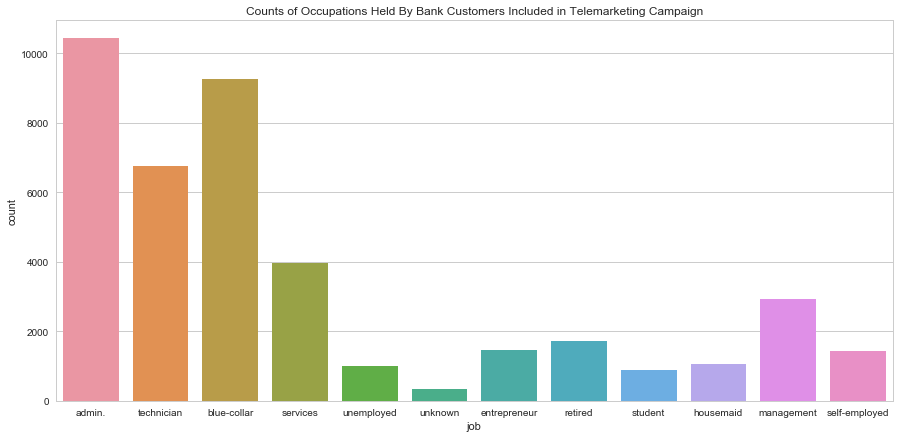

In [296]:
#fig, axs = plt.subplots(nrows=2, figsize = (15, 10))
plt.figure(figsize=(15, 7))
sortedjobs = pd.DataFrame()
sortedjobs = np.sort(data['job'])
plt.title("Counts of Occupations Held By Bank Customers Included in Telemarketing Campaign")
sns.countplot(data['job'])
#sns.countplot(data['job'], hue = data['y'], ax = axs[1])
#plt.xticks(rotation=0)
plt.savefig("/Users/jacquelynzuker/Desktop/bank_occupations.png")

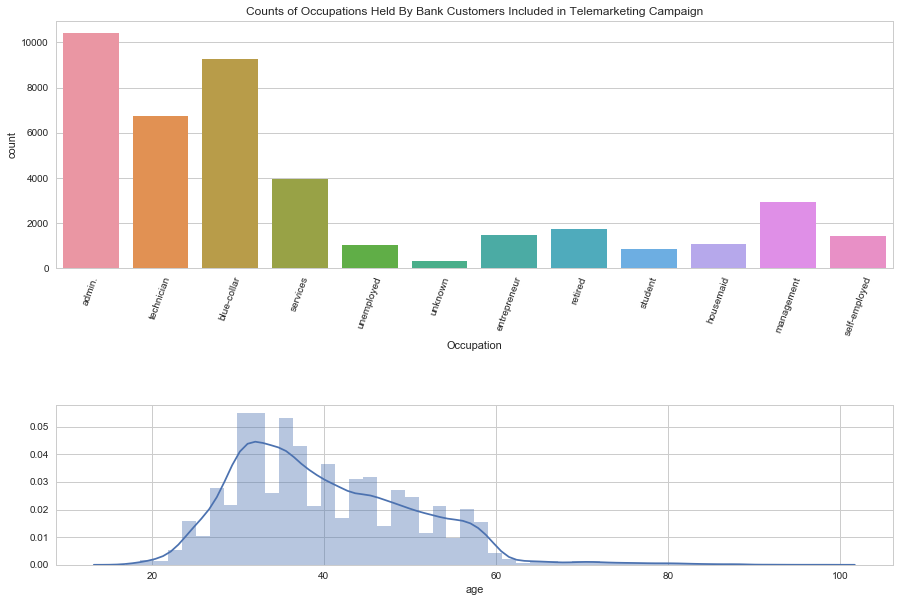

In [297]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
sns.countplot(data['job'])
plt.title("Counts of Occupations Held By Bank Customers Included in Telemarketing Campaign")
plt.xlabel('Occupation')
plt.xticks(rotation = 70)

plt.subplot(3, 1, 3)
sns.distplot(data['age'])

plt.show()

In [298]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

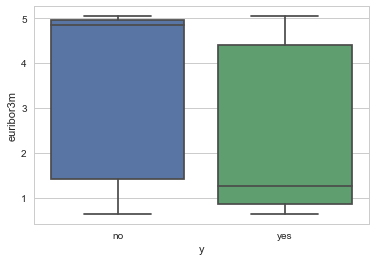

In [299]:
sns.boxplot(data['y'], data['euribor3m'])

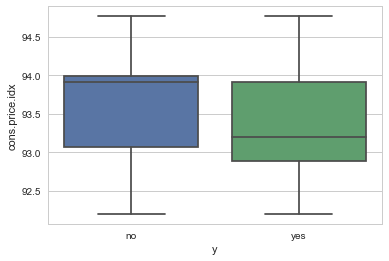

In [300]:
sns.boxplot(data['y'], data['cons.price.idx'])

In [301]:
data.y = data.y.apply(lambda x: 1 if x == 'yes' else 0)


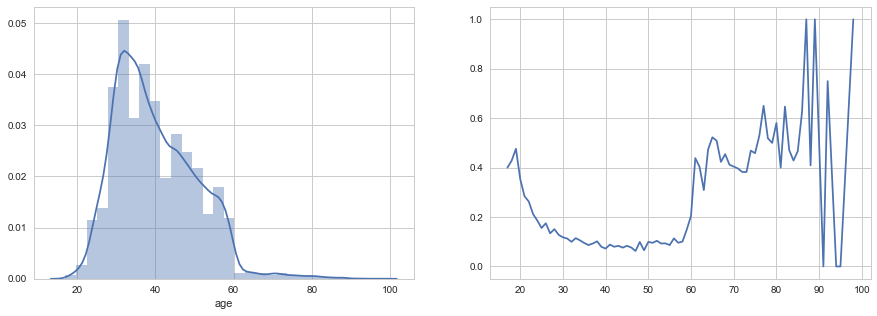

In [302]:
fig, axs = plt.subplots(ncols=2, figsize = (15,5))

sorted_age = np.sort(data["age"].unique())

def age_success_function (age, data): 
    success_rate = (len(data[((data['age'] == age) & (data['y'] == 1))]) / len(data[data['age'] == age]))
    return success_rate

age_rates = list()
age_percent = list()
age_volume = list()
for age in sorted_age: 
    age_rates.append(age)
    age_percent.append(age_success_function(age, data))
    age_volume.append(len(data[data['age'] == age]))

plt.plot(age_rates, age_percent) 
sns.distplot(data['age'], bins = 30, ax = axs[0])
plt.savefig("bank_ages.png")
plt.show()

## Data Cleaning

In [303]:
nans = pd.isnull(data).sum()
missing = nans[nans>0]
missing = list(missing.index)
print(missing)

# Drop the 'duration' variable, because this variable is useless for prediction purposes
# "Duration" is not known until the call is completed and at that point it is known if the campaign was successful. 
data = data.drop(['duration'], axis = 1)

[]


No nulls or missing values exist in this dataset.

## Feature Engineering

In this dataset we have a class imbalance problem. The positive outcomes only comprise ~13% of the dataset. This leads to models overly predicting a 'no' outcome because it is statistically safer. One approach is to remove a subset of the 'no' samples so that the two classes are balanced (i.e. ***under-sampling***) Another approach is to multiply the 'yes' samples so that both classes are of equal size. (i.e. ***over-sampling***) This will result in a better outcome than deleting 'no' samples, even if the 'yes' results become more weighted. 

In [304]:
diff = len(data[data.y ==0]) - len(data[data.y == 1])

In [305]:
# Over-Sampling script
#data.y = data.y.apply(lambda x: 1 if x == 'yes' else 0)

is_yes = data['y'] == 1
data_yes =  data[is_yes]
data_extrayes = data[data.y ==1].sample(diff, replace=True)
data = data.append(data_extrayes)

In [306]:
data.y.value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [307]:
label = data['y']
data = data.drop(['day_of_week'] , 1)
dataDummies = pd.get_dummies(data = data)
dataDummies.head()

# Try dropping features

# Find an economic indicator and scale the crisis

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,36,2,999,0,-1.8,92.893,-46.2,1.281,5099.1,0,...,0,0,0,1,0,0,0,0,1,0
1,39,1,999,0,1.4,93.444,-36.1,4.968,5228.1,0,...,0,0,0,0,0,0,0,0,1,0
2,24,2,999,0,1.4,93.918,-42.7,4.957,5228.1,0,...,1,0,0,0,0,0,0,0,1,0
3,29,2,999,1,-1.8,92.893,-46.2,1.281,5099.1,0,...,0,0,0,1,0,0,0,1,0,0
4,33,2,999,0,-1.8,93.075,-47.1,1.365,5099.1,1,...,0,0,0,0,0,0,0,0,1,0


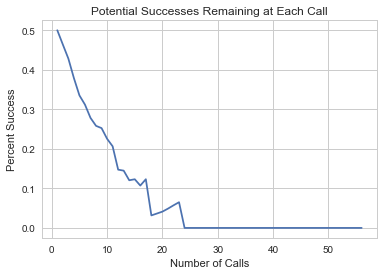

In [308]:
# What percentage of the population is left over everyone who could convert

#populationRemainingThatConvertsAtCampaignNumorHigher / totalPopulation
# What percent of people who take at least 3 calls will ever convert?

def cost_function(call_number, data):
    success_rate = len(data[((data['campaign']>=call_number) & 
                             (data['y']==1))]) / len(data[data['campaign'] >= call_number])
    return success_rate
sorted_campaign = np.sort(data['campaign'].unique())
successes_callnum = list()
successes = list()
#for campaign_call in range(len(data['campaign'].unique())):
for campaign_call in sorted_campaign:
    successes_callnum.append(campaign_call)
    successes.append(cost_function(campaign_call, data))    

    
sns.set_style('whitegrid')    
plt.plot(successes_callnum, successes)    
plt.title('Potential Successes Remaining at Each Call')
plt.xlabel("Number of Calls")
plt.ylabel("Percent Success")
plt.show()

In [309]:
np.round(sorted_euribor, decimals=2)


array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 91, 92, 94, 95, 98])

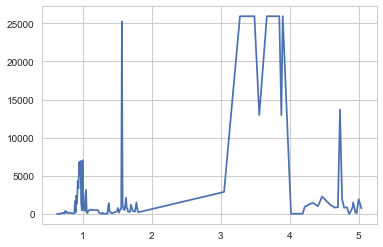

In [310]:
sorted_euribor = np.sort(data["euribor3m"].unique())
successes_euri_rates = list()
successes_euri_percent = list()
# Total number of successful outcomes. 
# Want percent success
# Successful outcomes at each Euribor rate / all outcomes at each Euribor rate
def euribor_cost_function (euribor_value, data): 
    success_rate = (len(data[((data['euribor3m'] <= euribor_value) & (data['y'] == 1))]) / len(data[data['euribor3m'] == euribor_value]))
    return success_rate

for euribor_rate in sorted_euribor: 
    successes_euri_rates.append(np.round(euribor_rate, decimals=2))
    successes_euri_percent.append(euribor_cost_function(euribor_rate, data))
    #print(euribor_rate)
n = len(sorted_euribor)    
sidebyside = pd.DataFrame(index=np.arange(n))
sidebyside['rates'] = successes_euri_rates
sidebyside['percent'] = successes_euri_percent
mydf = sidebyside.groupby("rates").mean()
#    successes_euri_rates, successes_euri_percent) 
#sidebyside.columns = ["rates", "percent"]
mydf
plt.plot(mydf.index, mydf['percent'])    
#plt.title("Total Calls Made at Each Euribor Rate")

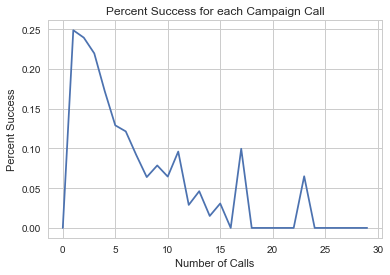

In [311]:
def cost_function(call_number, data):
    success_rate = len(data[((data['campaign']==call_number) & 
                             (data['y']==1))]) / len(data[data['campaign'] >= call_number])
    return success_rate

successes = list()
for campaign_call in range(len(data['campaign'].unique())):
    successes.append(cost_function(campaign_call, data))    

    
sns.set_style('whitegrid')    
plt.plot(successes[:30])    
plt.title('Percent Success for each Campaign Call')
plt.xlabel("Number of Calls")
plt.ylabel("Percent Success")
#success_on_third = len(data[((data['campaign']==3) & (data['y']==1))])
#success_on_third/len(data[data['campaign']>=3])


In [312]:
# # Perform Under-Sampling
# y = data['y']
# X = dataDummies
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler 

# print('Original dataset shape {}'.format(Counter(y)))

# # Under-Sampling

# rus = under_sampling.RandomUnderSampler(random_state=42)
# X_res, y_res = rus.fit_sample(X, y)
# print('Resampled dataset shape {}'.format(Counter(y_res)))

In [313]:
#y_res

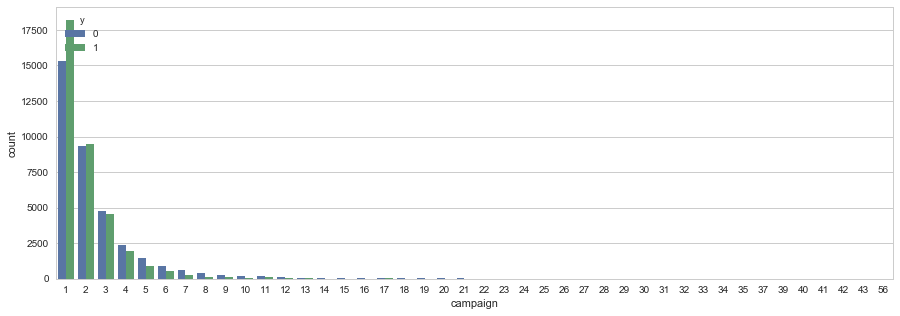

In [314]:
plt.figure(figsize=(15,5))
#datasuccess = data.groupby('y').mean()
sns.countplot(data['campaign'], hue=data['y'])
# probability of conversion on 3rd call
# What's the cost of the 4th call, and whats the ROI?



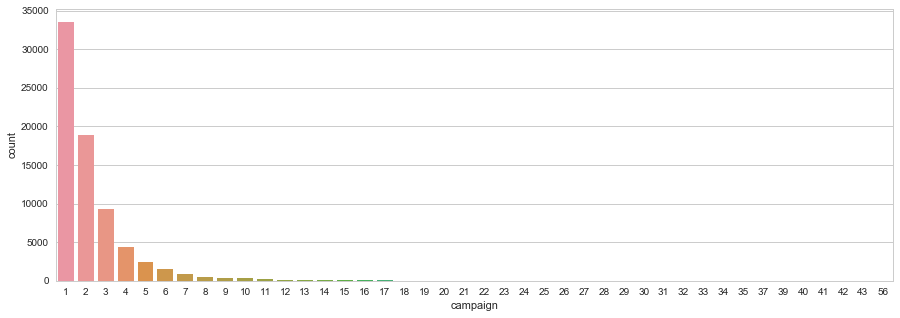

In [315]:
plt.figure(figsize=(15,5))
sns.countplot(data['campaign'])

In [316]:
datasuccess = data.groupby(data['y']).mean()
datasuccess

# Alex: Student's t-test? 



,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,
0,39.911185,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.933977,2.047171,795.523832,0.485964,-1.225372,93.353401,-39.808039,2.134326,5095.852919


In [317]:
data['campaign'].value_counts()

1     33536
2     18838
3      9321
4      4364
5      2388
6      1469
7       883
8       530
9       405
10      301
11      267
12      145
13      118
17       88
14       76
15       63
16       51
18       33
20       30
19       26
21       24
23       23
22       17
24       15
27       11
29       10
25        8
26        8
28        8
31        7
30        7
35        5
32        4
33        4
34        3
40        2
42        2
43        2
39        1
41        1
37        1
56        1
Name: campaign, dtype: int64

## Feature Filtering

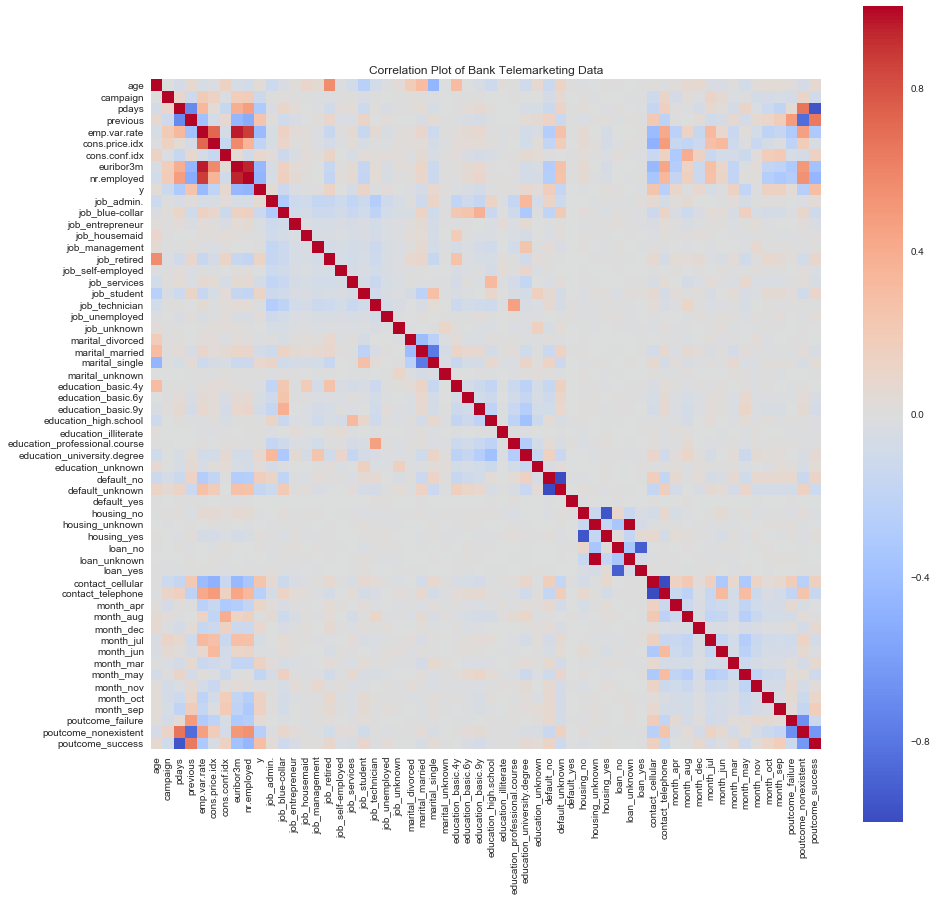

In [325]:
plt.figure(figsize = (15,15))
all_features = dataDummies.columns

# Correlation matrix of numerical features
corrmat = dataDummies[all_features].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax = .8, square = True, cmap = 'coolwarm')
plt.title("Correlation Plot of Bank Telemarketing Data")
plt.savefig("/Users/jacquelynzuker/Desktop/bank_corrs.png")
plt.show()

In [326]:
best_features = corrmat[corrmat["y"] >= 0.05]
best_features = list(best_features.index)

best_neg_features = corrmat[corrmat["y"] <= -0.05]
best_neg_features = list(best_neg_features.index)

all_best_features = best_features + best_neg_features



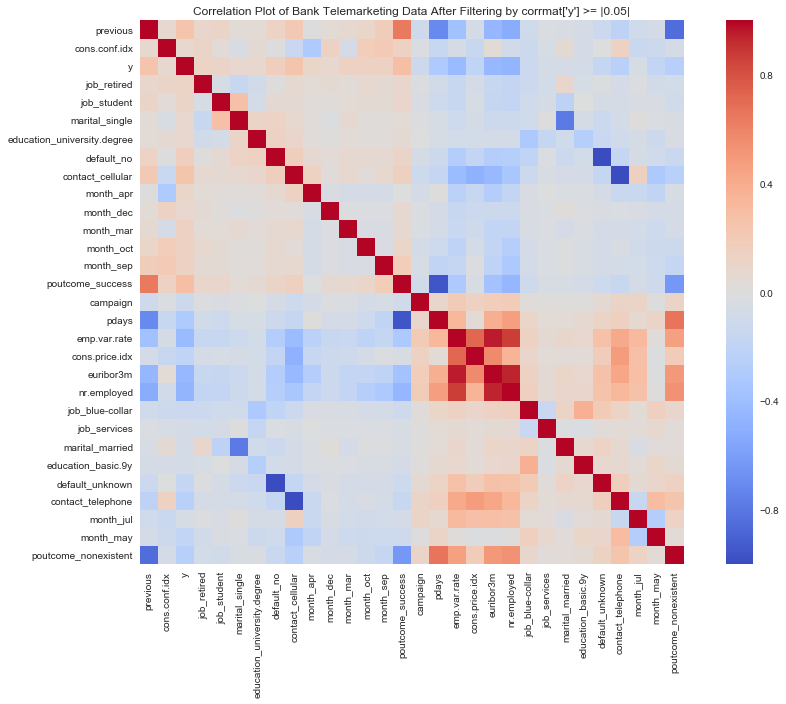

In [327]:
# Correlation matrix of numerical features
corrmat = dataDummies[all_best_features].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax = .8, square = True, cmap = 'coolwarm')
plt.title("Correlation Plot of Bank Telemarketing Data After Filtering by corrmat['y'] >= |0.05|")
plt.savefig("/Users/jacquelynzuker/Desktop/bank_corrsAfterFiltering.png")
plt.show()

In [335]:
label = data.y
dataDummies.columns
dataDummies.drop('y', axis = 1, inplace = True)
all_best_features.remove('y')

ValueError: list.remove(x): x not in list

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorith

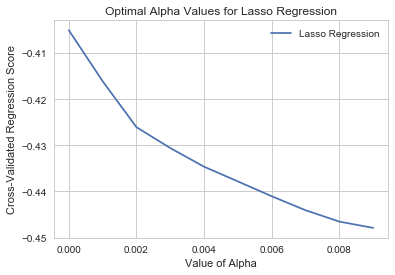

The optimal value for alpha in Lasso Regression is 0.0. 


In [329]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

interval = 0.001
alpha_range = np.arange(0,0.01,interval)
   
Y = label
X = dataDummies[all_features.drop('y')]

# search for an optimal correlation value for Linear Models
lasso_scores = []
for alphaVal in alpha_range: 
    lassBig = linear_model.Lasso(alpha=alphaVal)
    lasso_score = cross_val_score(lassBig, X, Y, cv=10)
    lasso_scores.append(lasso_score.mean())
    
# plot the performance of Lasso and Ridge Regression against the value of alpha
plt.plot(alpha_range, lasso_scores, label = "Lasso Regression")
plt.xlabel("Value of Alpha")
plt.ylabel("Cross-Validated Regression Score")
plt.legend()
plt.title("Optimal Alpha Values for Lasso Regression")
plt.show()

print("The optimal value for alpha in Lasso Regression is {}. ".format(lasso_scores.index(max(lasso_scores))*interval))
best_alpha = lasso_scores.index(max(lasso_scores))*interval


## Predictive Models

## Naive Bayes


In [337]:
#all_best_features.remove('y')

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#y_pred = gnb.fit(X, Y).predict(X)
X = dataDummies[all_best_features]
nb_score = cross_val_score(gnb, X, Y, cv=10)
print("Cross-Validated R-Squared of Logistic Regression Model: %0.2f (+/- %0.2f)" 
      % (nb_score.mean(), nb_score.std() * 2))


Cross-Validated R-Squared of Logistic Regression Model: 0.70 (+/- 0.01)


### Logistic Regression

In [340]:
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score

regr = linear_model.LogisticRegression()
Y = label
X = dataDummies[all_best_features]
regr.fit(X, Y)

# Inspect the results.

regr_score = cross_val_score(regr, X, Y, cv=10)
print("Cross-Validated R-Squared of Logistic Regression Model: %0.2f (+/- %0.2f)" 
      % (regr_score.mean(), regr_score.std() * 2))

# Small dataset: Logistic Regression Model: 0.74 (+/- 0.03)

# Large dataset: Logistic Regression Model: 0.56 (+/- 0.28) All features, over-sampling of minority
# Large dataset: Logistic Regression Model: 0.62 (+/- 0.28) |0.05| features included
# Large dataset: Logistic Regression Model: 0.74 (+/- 0.01) Reshuffled features, over sampling
#print(regr_score)
#print(all_best_features)

# Check out p-values for each column


Cross-Validated R-Squared of Logistic Regression Model: 0.74 (+/- 0.01)
['previous', 'cons.conf.idx', 'job_retired', 'job_student', 'marital_single', 'education_university.degree', 'default_no', 'contact_cellular', 'month_apr', 'month_dec', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_services', 'marital_married', 'education_basic.9y', 'default_unknown', 'contact_telephone', 'month_jul', 'month_may', 'poutcome_nonexistent']


IndexError: index 1 is out of bounds for axis 0 with size 1

### SVC

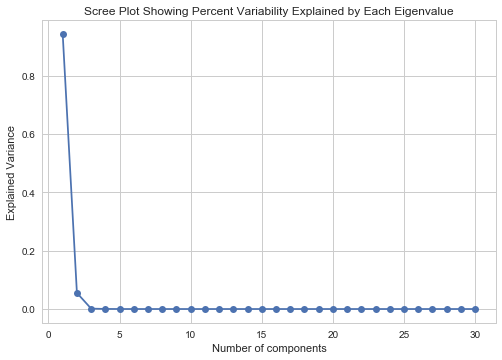

In [94]:
Y = label
X = dataDummies[all_features.drop('y')]

from sklearn.decomposition import PCA
pca = PCA(n_components=30, whiten=True)
a = pca.fit(X, Y)
variance = pd.DataFrame(pca.explained_variance_ratio_)

plt.figure(1, figsize=(9, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])

dat = range(1, 31)
plt.plot(dat, variance, marker='o')

plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title("Scree Plot Showing Percent Variability Explained by Each Eigenvalue")

plt.show()

In [95]:
from sklearn.svm import SVC 

svc = SVC()
pca = PCA(n_components=4, whiten=True)
X_pca = pca.fit_transform(X)
variance = pd.DataFrame(pca.explained_variance_ratio_)

svc.fit(X_pca, Y)
prediction = svc.predict(X_pca)



In [96]:
svc_score = cross_val_score(svc, X, Y, cv=5)
print("Cross-Validated R-Squared of SVC Model: %0.2f (+/- %0.2f)" 
      % (svc_score.mean(), svc_score.std() * 2))

# Small dataset: SVC Model: 0.79 (+/- 0.01)
# Large dataset: SVC Model: 0.43 (+/- 0.16) -All features, over-sampling of minority
# Large dataset: SVC Model: 0.76 (+/- 0.00) - Shuffled features, oversampling


Cross-Validated R-Squared of SVC Model: 0.76 (+/- 0.00)


In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, prediction)


array([[31722,  4826],
       [14635, 21913]])

## SVC without PCA
    

In [105]:
from sklearn.svm import SVC 

Y = label
X = dataDummies[all_features.drop('y')]

svc = SVC()
svc_score = cross_val_score(svc, X, Y, cv=4)
print("Cross-Validated R-Squared of SVC Model: %0.2f (+/- %0.2f)" 
      % (svc_score.mean(), svc_score.std() * 2))
# SVC without PCA: 0.76 (+/- 0.01)

Cross-Validated R-Squared of SVC Model: 0.76 (+/- 0.01)


### Random Forest

In [98]:
Y = label
X = dataDummies[all_features.drop('y')]

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 500)

rfc_score = cross_val_score(rfc, X, Y, cv = 10)
print("Random Forest: %0.2f (+/- %0.2f)" % (rfc_score.mean(), rfc_score.std() * 2))
# Small dataset: Random Forest: 0.97 (+/- 0.01)
# Large dataset: Random Forest: 0.77 (+/- 0.32)-All features, over-sampling of minority
# Large dataset: Random Forest: 0.65 (+/- 0.24)- |0.05| features included, over-sampling

Random Forest: 0.97 (+/- 0.01)


In [99]:
rfc.fit(X,Y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text xticklabel objects>)

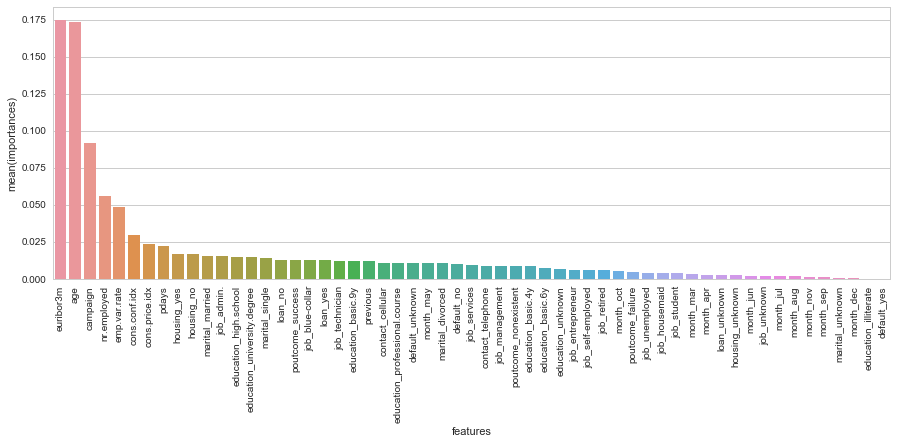

In [100]:
features = list(X.columns)
importances = list(rfc.feature_importances_)
index = range(len(X.columns))

d = {'features': features, 'importances': importances}
best_features = pd.DataFrame(data=d, index=index)
best_features.sort(columns="importances", ascending = False, inplace=True)

plt.figure(figsize = (15,5))
sns.barplot(best_features["features"], best_features["importances"])
plt.xticks(rotation = 90)

In [59]:
#sns.distplot(data[data['age'] & data['y'] == 1])
#sns.distplot(data[data['age'] & data['y'] == 0])

In [60]:
# Choose best features, export csv and make charts
#export_features = pd.DataFrame(data[["euribor3m", "age", 'campaign', "emp.var.rate", "nr.employed"]])
#export_features.to_csv('/Users/jacquelynzuker/Desktop/marketingData.csv')
#data.nr.employed

### Boosted Models: Gradient Descent

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

Y = label
X = dataDummies[all_features.drop('y')]

gb_class = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1,
    max_depth=5)

gb_class_score = cross_val_score(gb_class, X, Y, cv=10)
print("Gradient Boost Regression: %0.2f (+/- %0.2f)" % (gb_class_score.mean(), gb_class_score.std() * 2))
# Small dataset: Gradient Boost Regression: 0.96 (+/- 0.01)
# Large dataset: Gradient Boost Regression: 0.54 (+/- 0.23)
# Large dataset: Gradient Boost Regression: 0.50 (+/- 0.22)

# Large dataset: Gradient Boost Regression: 0.78 (+/- 0.01) Filtered features, after shuffle

Gradient Boost Regression: 0.81 (+/- 0.01)


In [102]:
gbc = gb_class.fit(X, Y)
gbc.feature_importances_

gbc_features = list(X.columns)
gbc_importances = list(gbc.feature_importances_)
index = range(len(X.columns))

d = {'features': gbc_features, 'importances': gbc_importances}
gbc_best_features = pd.DataFrame(data=d, index=index)
gbc_best_features.sort(columns="importances", ascending = False, inplace=True)



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text xticklabel objects>)

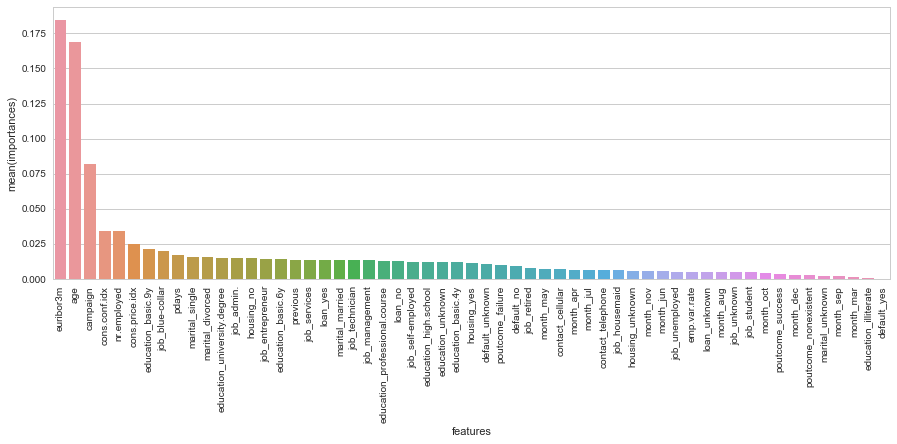

In [103]:
plt.figure(figsize = (15,5))
sns.barplot(gbc_best_features["features"], gbc_best_features["importances"])
plt.xticks(rotation = 90)

In [ ]:
#percentSuccess = data.groupby(data.euribor3m).mean()
#percentSuccess
#sns.regplot(percentSuccess.index, percentSuccess.y)

## First Contact: 
### Where to focus marketing effort? 

In [ ]:
#first_contact['y'].value_counts()



Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output 
target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


Relevant Papers:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]




In [ ]:
# First Contact: 

